# Merge

In [12]:
import numpy as np
import cdflib
import pytplot
from pytplot import tplot,cdf_to_tplot, data_quants, options, tplot_names, store_data
import pyspedas
import xarray as xr

In [13]:
# RAD1のデータを読み込む
# ファイル名
file_path_1 = "wi_l2_wav_rad1_20220613_v01.cdf"
# CDFファイルを開く
cdf_file_1 = cdflib.CDF(file_path_1)
# CDFファイルの読み込み
pytplot.cdf_to_tplot(file_path_1)

rad1_background = cdflib.CDF(file_path_1).varget(cdflib.CDF(file_path_1).cdf_info().zVariables[5])[0:32]
rad1_data = data_quants["PSD_V2_S"].sel(v_dim=slice(0, 32))
rad1_frequency = data_quants["PSD_V2_S"]['spec_bins'].sel(v_dim=slice(0, 32))

pytplot.store_data('Rad1_data', data={'x': rad1_data['time'], 'y': rad1_data, 'v': rad1_frequency})

True

In [14]:
# RAD2のデータを読み込む
# ファイル名
file_path_2 = "wi_l2_wav_rad2_20220613_v01.cdf"
# CDFファイルを開く
cdf_file_2 = cdflib.CDF(file_path_2)
# CDFファイルの読み込み
pytplot.cdf_to_tplot(file_path_2)

rad2_background = cdflib.CDF(file_path_2).varget(cdflib.CDF(file_path_2).cdf_info().zVariables[5])
rad2_data = data_quants["PSD_V2_S"]/rad2_background
rad2_frequency = data_quants["PSD_V2_S"]['spec_bins']

pytplot.store_data('Rad2_data', data={'x': rad2_data['time'], 'y': rad2_data, 'v': rad2_frequency})

True

In [15]:
# 2つのデータの時間を統合
pyspedas.tinterpol('Rad1_data', 'Rad2_data')

17-Jul-24 15:53:23: tinterpol (linear) was applied to: Rad1_data-itrp


In [16]:
# 2つのデータを統合
rad1_data = data_quants["Rad1_data-itrp"]/rad1_background
rad_merged = xr.concat([rad1_data, rad2_data], dim='v_dim')
# print(rad_merged)

In [29]:
# xarrayからnumpy配列に変換
rad1_frequency_array = np.array(rad1_frequency)
rad2_frequency_array = np.array(rad2_frequency)
# 2つのnumpy配列(周波数)を結合
merged_frequency_array = np.concatenate((rad1_frequency_array, rad2_frequency_array))

In [18]:
# def variables_show(file_path):
#     # ファイルのパス
#     # file_path_1 = 'hf_20220417.cdf'

#     # CDFファイルを開く
#     cdf_file = cdflib.CDF(file_path)

#     # CDFファイルに含まれる変数の情報を取得
#     variables_info = cdf_file.cdf_info()

#     z_value = variables_info.zVariables
#     print(f"zVariables: {z_value}")
#     print("\n")
    
    
#     # var_name_show = variables_info['zVariables']
#     for i in range(len(z_value)):
#         print(f"Variable: {z_value[i]}")

#         # # 変数の属性を取得
#         # var_attributes = cdf_file.varattsget(variables_info['zVariables'][i])
#         print(f"Attributes: {cdf_file.varattsget(z_value[i])}")

#         #変数のデータを取得
#         var_data_show = cdf_file.varget(z_value[i])
#         print(f"Data: {cdf_file.varget(z_value[i])}")
        
#         # 変数のタイプ
#         print(f"Type: {type(cdf_file.varget(z_value[i]))}")
        
#         # 変数の次元数
#         print(f"Dimension: {cdf_file.varget(z_value[i]).ndim}")
        
#         # 変数のサイズ
#         print(f"Shape: {cdf_file.varget(z_value[i]).shape}")
        
#         # 変数の全要素数
#         print(f"Size: {cdf_file.varget(z_value[i]).size}")
        
        
#         print("-----------")
        
        
# variables_show(file_path_1)
# # variables_show("wi_l2_wav_rad2_20220613_v01.cdf")

# rad_merged で規格化

        0 : 2.0000000e+04,  1 : 2.4000002e+04,  2 : 2.8000002e+04,  3 : 3.2000000e+04,
        4 : 3.6000000e+04,  5 : 4.0000000e+04,  6 : 4.4000004e+04,  7 : 4.8000004e+04,
        8 : 5.2000004e+04,  9 : 6.0000004e+04,  10 : 7.2000000e+04,  11 : 8.0000000e+04,
        12 : 9.2000008e+04,  13 : 1.0400001e+05,  14 : 1.1600001e+05,  15 : 1.3600000e+05,
        16 : 1.5200000e+05,  17 : 1.7600002e+05,  18 : 1.9600002e+05,  19 : 2.2400002e+05,
        20 : 2.5600000e+05,  21 : 2.9200000e+05,  22 : 3.3200003e+05,  23 : 3.7600003e+05,
        24 : 4.2800003e+05,  25 : 4.8400003e+05,  26 : 5.4800000e+05,  27 : 6.2400000e+05,
        28 : 7.0800006e+05,  29 : 8.0400006e+05,  30 : 9.1600006e+05,  31 : 1.0400000e+06

1.075MHz = 32

4.975 MHz = 110

5.025MHz = 111

6.075MHz = 132

9.975MHz = 210

10.025MHz = 211

11.075MHz = 232

13.825MHz = 287

## 04:25-04:40

n_min = 13 = 0.10400000959634781 MHz

n_max = 287 = 13.825000762939453 MHz
 ---------------------------------- 



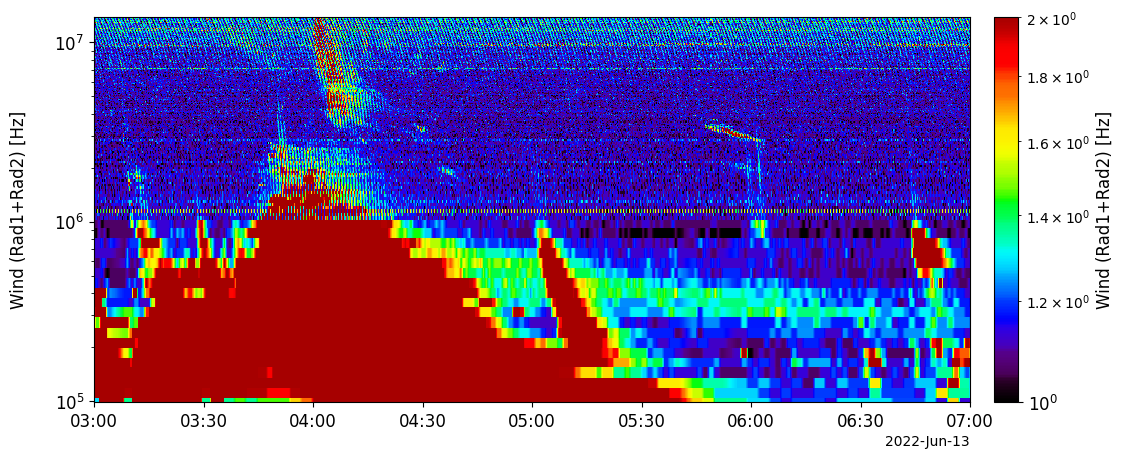

In [34]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 1, 'spec':1, 'zrange':[1.0, 2.0]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:00:00", "2022-06-13 07:00:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

### Fundamental

n_min = 46 = 1.7750001249999998 MHz

n_max = 51 = 2.025000125 MHz
 ---------------------------------- 



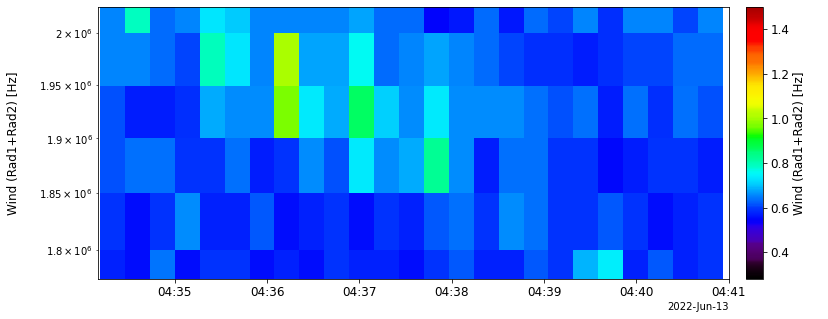

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1, 'zrange':[0.28, 1.5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 04:34:10", "2022-06-13 04:41:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

n_min = 40 = 1.475000125 MHz

n_max = 60 = 2.475 MHz
 ---------------------------------- 



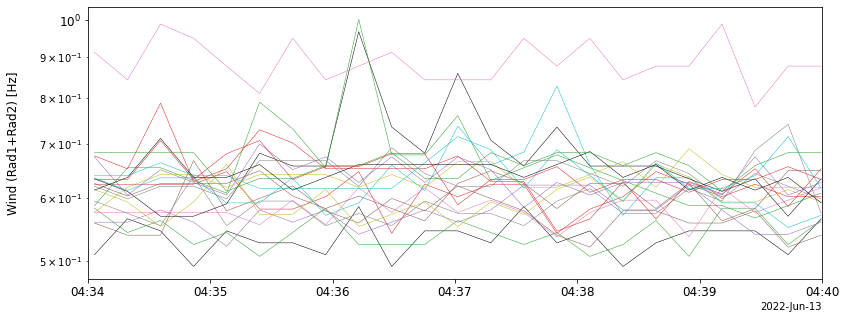

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 0, 'spec':0, 'zrange':[0.28, 1.5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 04:34:00", "2022-06-13 04:40:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

### Harmonic

n_min = 70 = 2.97500025 MHz

n_max = 90 = 3.97500025 MHz
 ---------------------------------- 



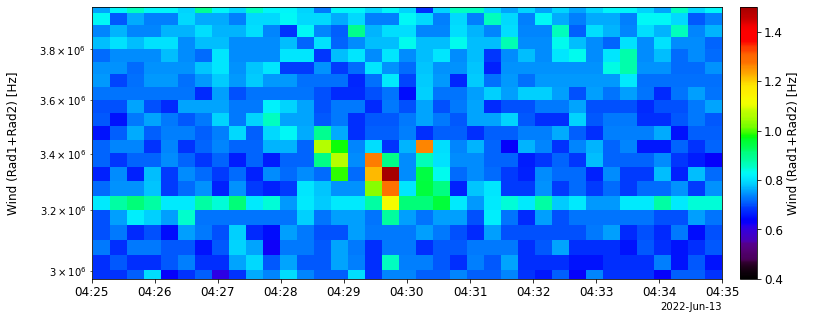

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1, 'zrange':[0.4, 1.5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 04:25:00", "2022-06-13 04:35:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

n_min = 70 = 2.97500025 MHz

n_max = 90 = 3.97500025 MHz
 ---------------------------------- 



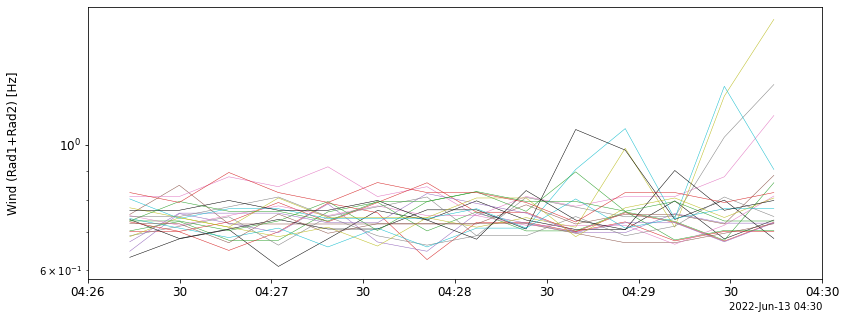

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 0, 'spec':0, 'zrange':[0.4, 1.5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 04:26:00", "2022-06-13 04:30:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

## 05:45-06:05

n_min = 28 = 0.7080000624999999 MHz

n_max = 110 = 4.975 MHz
 ---------------------------------- 



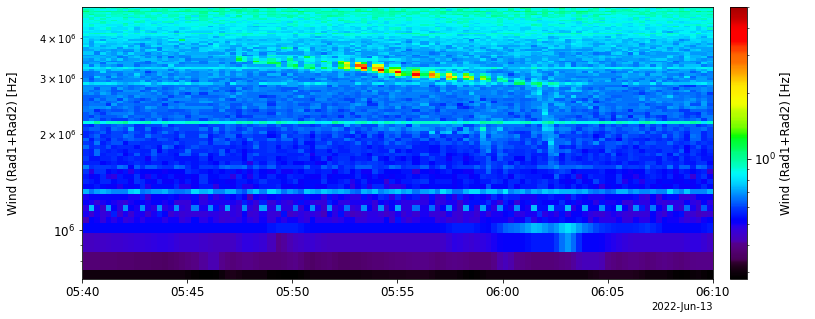

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 1, 'spec':1, 'zrange':[0.28, 5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 05:40:00", "2022-06-13 06:10:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

### Harmonic

n_min = 60 = 2.475 MHz

n_max = 110 = 4.975 MHz
 ---------------------------------- 



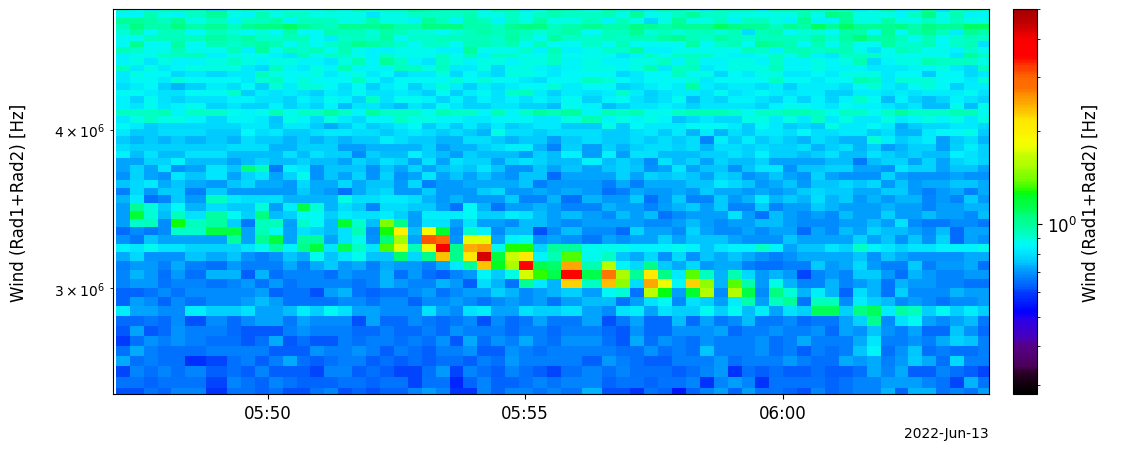

In [11]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 1, 'spec':1, 'zrange':[0.28, 5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 05:47:00", "2022-06-13 06:04:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

n_min = 75 = 3.22500025 MHz

n_max = 85 = 3.72500025 MHz
 ---------------------------------- 



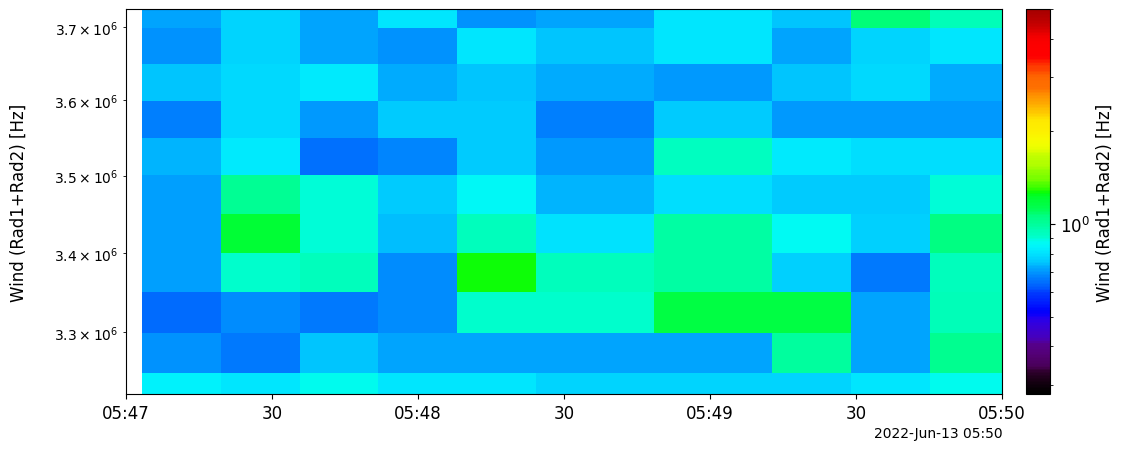

In [14]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 1, 'spec':1, 'zrange':[0.28, 5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 05:47:00", "2022-06-13 05:50:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

n_min = 60 = 2.475 MHz

n_max = 80 = 3.47500025 MHz
 ---------------------------------- 



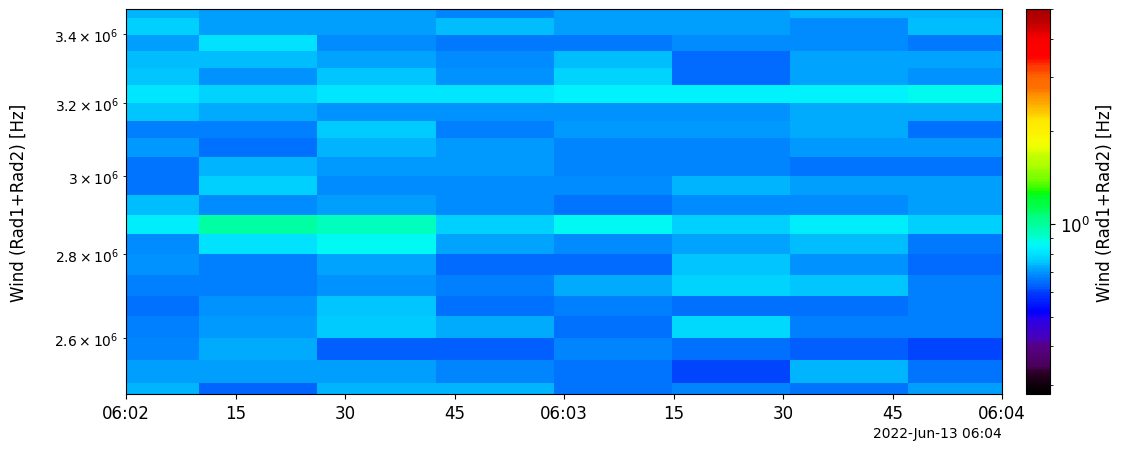

In [16]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 1, 'spec':1, 'zrange':[0.28, 5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 06:02:00", "2022-06-13 06:04:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

n_min = 32 = 1.075 MHz

n_max = 60 = 2.475 MHz
 ---------------------------------- 



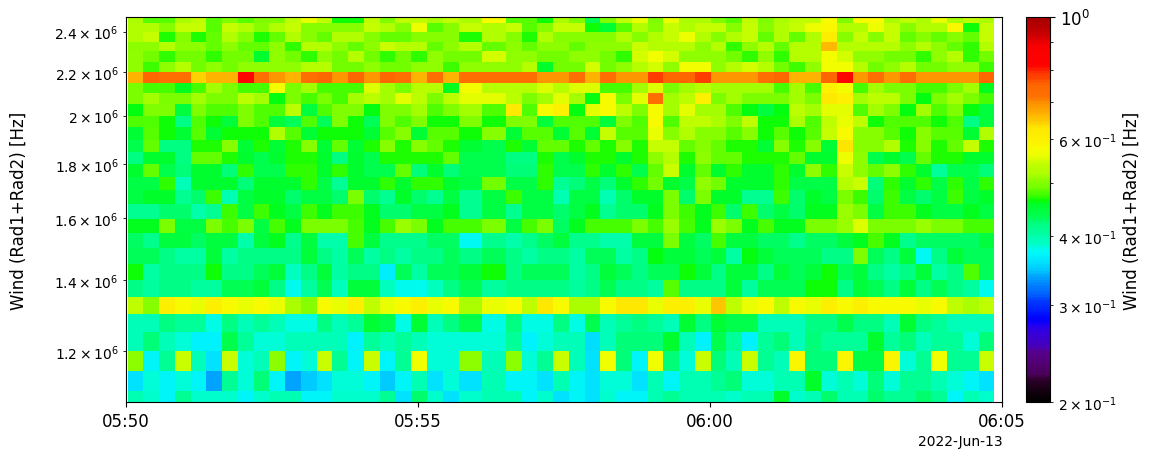

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged#/rad_merged.mean()


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad1+Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad1+Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 1, 'spec':1, 'zrange':[0.2, 1]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 05:50:00", "2022-06-13 06:05:00")
pytplot.tplot('Wind (Rad1+Rad2) [Hz]')

## All

n_min = 0 = 0.02 MHz

n_max = 287 = 13.825000999999999 MHz
 ---------------------------------- 



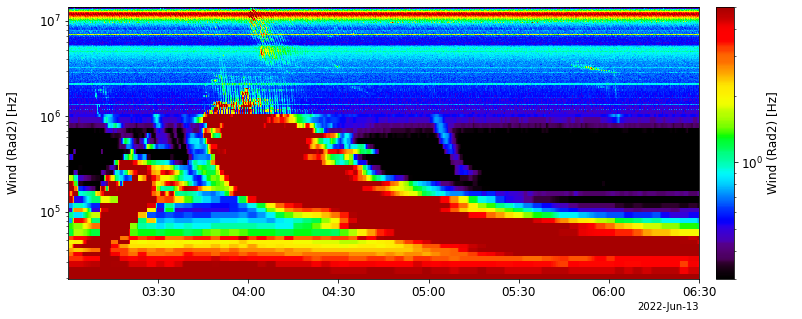

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 1, 'spec':1, 'zrange':[0.3, 5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:00:10", "2022-06-13 06:30:00")
pytplot.tplot('Wind (Rad2) [Hz]')

n_min = 0 = 0.02 MHz

n_max = 287 = 13.825000999999999 MHz
 ---------------------------------- 



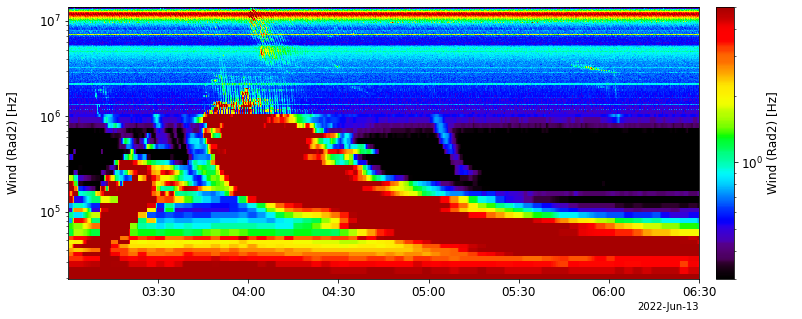

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 1, 'spec':1, 'zrange':[0.3, 5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:00:10", "2022-06-13 06:30:00")
pytplot.tplot('Wind (Rad2) [Hz]')

n_min = 0 = 0.02 MHz

n_max = 287 = 13.825000999999999 MHz
 ---------------------------------- 



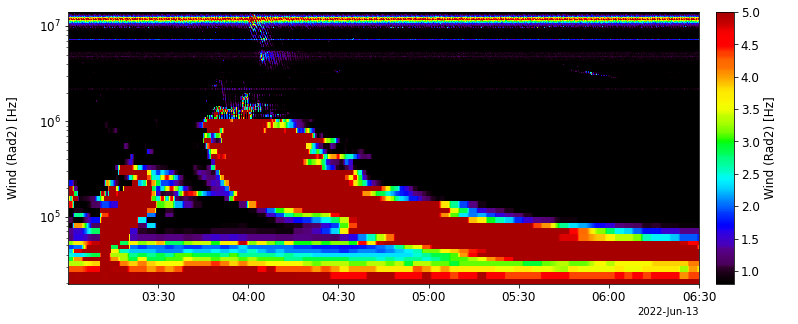

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {merged_frequency_array[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {merged_frequency_array[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1, 'zrange':[0.8, 5]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:00:10", "2022-06-13 06:30:00")
pytplot.tplot('Wind (Rad2) [Hz]')

n_min = 0 = 0.02 MHz

n_max = 287 = 13.825000999999999 MHz
 ---------------------------------- 



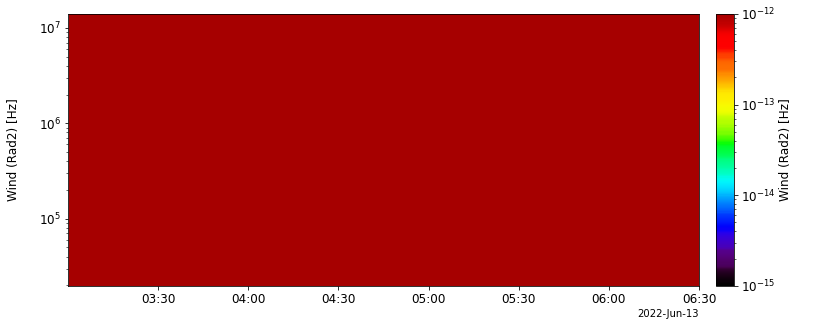

In [ ]:
#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
# ['PSD_V2_S', 'PSD_V2_SP', 'PSD_V2_Z']
time = rad_merged['time']
data = rad_merged


# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = ")) # 0-287
n_max += 1
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = merged_frequency_array[n_min:n_max]

print(f'n_min = {n_min} = {v_dim_slice[n_min]*1e-6} MHz\n')
print(f'n_max = {n_max-1} = {v_dim_slice[n_max-1]*1e-6} MHz\n ---------------------------------- \n')


# plot
# time = data_quants["PSD_V2_S"]['time'], data_index = data_quants["PSD_V2_S"], v_dim_slice = data_quants["PSD_V2_S"]['spec_bins']
pytplot.store_data('Wind (Rad2) [Hz]', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('Wind (Rad2) [Hz]', opt_dict={'ylog': 1, 'zlog': 1, 'spec':1, 'zrange':[1e-15, 1e-12]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:00:10", "2022-06-13 06:30:00")
pytplot.tplot('Wind (Rad2) [Hz]')